In [1]:
# Import relevant libraries
import glob
import requests
import pandas as pd
import numpy as np
import string
import googlemaps
import gmaps
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import string
import random
from decimal import Decimal
from scipy.stats import linregress
import scipy.stats as stats
import numpy

import warnings
warnings.filterwarnings('ignore')

In [2]:
# READ DATA INTO DATAFRAMES
file = "Resources/state_lat_lng.csv"
read_file = pd.read_csv(file, encoding='latin1')
state_df = pd.DataFrame(read_file)

file = "Resources/combined_data.csv"
read_file = pd.read_csv(file, encoding='latin1')
df = pd.DataFrame(read_file)

In [3]:
# Read Superfund locations
url = "Resources/priorities_list_full.json"
with open(url) as datafile:
    data = json.load(datafile)
superfund_site_df = pd.DataFrame(data)
superfund_locations = superfund_site_df[['latitude', 'longitude']]
superfund_locations = superfund_locations.dropna()

# Number of Sites per State
state_count = superfund_site_df.groupby(['State_name']).count()
state_count = state_count['site_epa_id']
state_count
state_count_df = pd.DataFrame(state_count)
state_count = state_count_df.rename(index=str, columns={"site_epa_id": "Sites", "State_name": "State"})
sorted_state_count = state_count.sort_values(by="Sites", ascending=False)
sorted_state_count.to_csv("Resources/Superfund_count_by_state.csv")
sorted_state_count.head(10)

,Sites
State_name,
New Jersey,115
California,98
Pennsylvania,97
New York,85
Michigan,65
Florida,54
Texas,53
Washington,51
Illinois,44


In [4]:
# Example: my_list = df["cluster"].tolist()
site_count  = sorted_state_count["Sites"].tolist()
state_label = sorted_state_count.index.get_values()

In [5]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 16
fig_size[1] =7
plt.rcParams["figure.figsize"] = fig_size

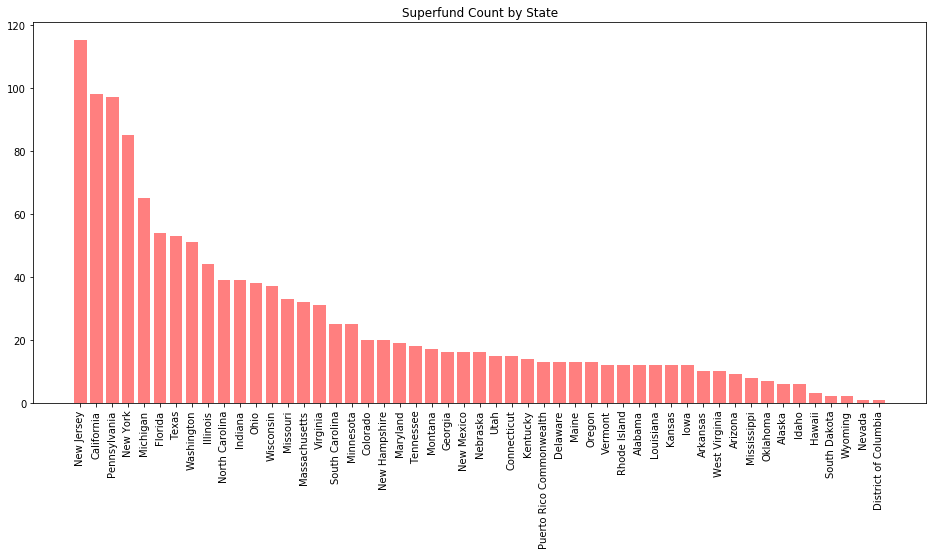

In [6]:
# Plot Superfund Count per State
plt.title("Superfund Count by State")
plt.bar(state_label, site_count,  facecolor="red", alpha=0.5, align="center")
plt.xticks(rotation='vertical',linespacing = 1)
plt.savefig("Images/superfund_count_by_state.png")
plt.show()

In [7]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [8]:
df['County'] = df['County'].map(lambda x: x.lstrip('').rstrip('(3'))
df['County'] = df['County'].map(lambda x: x.lstrip('').rstrip('(5'))
df['Age-Adjusted Incident Rate'] = df['Age-Adjusted Incident Rate'].map(lambda x: x.lstrip('').rstrip('#'))
df = df[df['State'] != 'Nevada']
same_df = df[df['State'] == df['County']]

breast_df        = same_df.set_index('Cancer Type').filter(like='Breast', axis=0)
colon_df         = same_df.set_index('Cancer Type').filter(like='Colon & Rectum', axis=0)
lung_df          = same_df.set_index('Cancer Type').filter(like='Lung & Bronchus', axis=0)
prostate_df      = same_df.set_index('Cancer Type').filter(like='Prostate', axis=0)

In [9]:
# SEPERATE DATAFRAMES INTO SEPARATE CANCER TYPES

In [10]:
breast_joined_df   = state_df.join(breast_df.set_index('State'), on='State')
colon_joined_df    = state_df.join(colon_df.set_index('State'), on='State')
lung_joined_df     = state_df.join(lung_df.set_index('State'), on='State')
prostate_joined_df = state_df.join(prostate_df.set_index('State'), on='State')

In [11]:
lung_joined_df = lung_joined_df.dropna()
lung_joined_df = lung_joined_df.rename(index=str, columns={"State": "State_name"})
lung_result = pd.merge(lung_joined_df, sorted_state_count, on='State_name', how='left')
lung_result.head()

,State_name,Latitude,Longitude,Unnamed: 0,Years,County,FIPS,Met Health Obj,Age-Adjusted Incident Rate,Lower 95% Confidence Interval,...,Upper 95% Confidence Interval,Upper 95% Confidence Interval.1,Average Annual Count,Recent Trend,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval.2,Lower 95% Confidence Interval.3,Upper 95% Confidence Interval.2,Upper 95% Confidence Interval.3,Sites
0,Alabama,32.806671,-86.791130,8.0,2011-2015,Alabama,1000.0,***,67.7,66.8,...,68.7,-2.7,3967,falling,-3,66.8,-3.4,68.7,-2.7,12.0
1,Alaska,61.370716,-152.404419,8.0,2011-2015,Alaska,2900.0,***,57.2,54.3,...,60.2,-0.8,342,falling,-4.5,54.3,-8,60.2,-0.8,6.0
2,Arizona,33.729759,-111.431221,8.0,2011-2015,Arizona,4000.0,***,49.3,48.6,...,50,-2.2,3902,falling,-3.1,48.6,-4.1,50,-2.2,9.0
3,Arkansas,34.969704,-92.373123,8.0,2011-2015,Arkansas,5000.0,***,78,76.7,...,79.3,2.2,2818,stable,0.2,76.7,-1.8,79.3,2.2,10.0
4,California,36.116203,-119.681564,8.0,2011-2015,California,6000.0,***,43.3,43.1,...,43.6,-3.3,16864,falling,-3.9,43.1,-4.4,43.6,-3.3,98.0


In [12]:
colon_joined_df = colon_joined_df.dropna()
colon_joined_df = colon_joined_df.rename(index=str, columns={"State": "State_name"})
colon_result = pd.merge(colon_joined_df, sorted_state_count, on='State_name', how='left')
colon_result.head()

,State_name,Latitude,Longitude,Unnamed: 0,Years,County,FIPS,Met Health Obj,Age-Adjusted Incident Rate,Lower 95% Confidence Interval,...,Upper 95% Confidence Interval,Upper 95% Confidence Interval.1,Average Annual Count,Recent Trend,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval.2,Lower 95% Confidence Interval.3,Upper 95% Confidence Interval.2,Upper 95% Confidence Interval.3,Sites
0,Alabama,32.806671,-86.791130,8.0,2011-2015,Alabama,1000.0,No,43.5,42.7,...,44.3,3.1,2458,stable,0.3,42.7,-2.3,44.3,3.1,12.0
1,Alaska,61.370716,-152.404419,8.0,2011-2015,Alaska,2900.0,No,42,39.6,...,44.5,4.2,269,stable,1.3,39.6,-1.5,44.5,4.2,6.0
2,Arizona,33.729759,-111.431221,8.0,2011-2015,Arizona,4000.0,Yes,33.6,33,...,34.2,-0.1,2564,falling,-2.3,33,-4.3,34.2,-0.1,9.0
3,Arkansas,34.969704,-92.373123,8.0,2011-2015,Arkansas,5000.0,No,43.6,42.6,...,44.6,2.8,1515,rising,1.9,42.6,1,44.6,2.8,10.0
4,California,36.116203,-119.681564,8.0,2011-2015,California,6000.0,Yes,36.2,36,...,36.5,-0.5,14418,falling,-2,36,-3.6,36.5,-0.5,98.0


In [13]:
breast_joined_df = breast_joined_df.dropna()
breast_joined_df = breast_joined_df.rename(index=str, columns={"State": "State_name"})
breast_result = pd.merge(breast_joined_df, sorted_state_count, on='State_name', how='left')
breast_result.head()

,State_name,Latitude,Longitude,Unnamed: 0,Years,County,FIPS,Met Health Obj,Age-Adjusted Incident Rate,Lower 95% Confidence Interval,...,Upper 95% Confidence Interval,Upper 95% Confidence Interval.1,Average Annual Count,Recent Trend,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval.2,Lower 95% Confidence Interval.3,Upper 95% Confidence Interval.2,Upper 95% Confidence Interval.3,Sites
0,Alabama,32.806671,-86.791130,8.0,2011-2015,Alabama,1000.0,***,120.9,119.1,...,122.7,1.7,3645,rising,1,119.1,0.2,122.7,1.7,12.0
1,Arizona,33.729759,-111.431221,8.0,2011-2015,Arizona,4000.0,***,112.9,111.4,...,114.4,3,4443,stable,0.3,111.4,-2.4,114.4,3,9.0
2,Arkansas,34.969704,-92.373123,8.0,2011-2015,Arkansas,5000.0,***,114.7,112.4,...,116.9,5.6,2080,stable,2,112.4,-1.5,116.9,5.6,10.0
3,California,36.116203,-119.681564,8.0,2011-2015,California,6000.0,***,121.5,120.9,...,122.2,0.3,25689,stable,-0.1,120.9,-0.4,122.2,0.3,98.0
4,Colorado,39.059811,-105.311104,8.0,2011-2015,Colorado,8000.0,***,123.5,121.7,...,125.4,1.4,3587,stable,0.5,121.7,-0.5,125.4,1.4,20.0


In [14]:
prostate_joined_df = prostate_joined_df.dropna()
prostate_joined_df = prostate_joined_df.rename(index=str, columns={"State": "State_name"})
prostate_result = pd.merge(prostate_joined_df, sorted_state_count, on='State_name', how='left')
prostate_result.head()

,State_name,Latitude,Longitude,Unnamed: 0,Years,County,FIPS,Met Health Obj,Age-Adjusted Incident Rate,Lower 95% Confidence Interval,...,Upper 95% Confidence Interval,Upper 95% Confidence Interval.1,Average Annual Count,Recent Trend,Recent 5-Year Trend in Incidence Rates,Lower 95% Confidence Interval.2,Lower 95% Confidence Interval.3,Upper 95% Confidence Interval.2,Upper 95% Confidence Interval.3,Sites
0,Alabama,32.806671,-86.791130,8.0,2011-2015,Alabama,1000.0,***,123.4,121.5,...,125.3,1.5,3394,stable,-5.6,121.5,-12.3,125.3,1.5,12.0
1,Alaska,61.370716,-152.404419,8.0,2011-2015,Alaska,2900.0,***,79.6,75,...,84.4,-4.9,280,falling,-10,75,-14.8,84.4,-4.9,6.0
2,Arizona,33.729759,-111.431221,8.0,2011-2015,Arizona,4000.0,***,78.6,77.4,...,79.9,5.6,3019,stable,-1.4,77.4,-8,79.9,5.6,9.0
3,Arkansas,34.969704,-92.373123,8.0,2011-2015,Arkansas,5000.0,***,115.9,113.6,...,118.2,4.8,2001,stable,-4.7,113.6,-13.4,118.2,4.8,10.0
4,California,36.116203,-119.681564,8.0,2011-2015,California,6000.0,***,101.2,100.5,...,101.8,-6.2,19253,falling,-9.2,100.5,-12,101.8,-6.2,98.0


In [15]:
# CREATE NEW TABLES WITH INCIDENT RATE VS. SITES

In [16]:
lung_short = lung_result[['State_name', 'Age-Adjusted Incident Rate', 'Sites']]
lung_short['Age-Adjusted Incident Rate'] = lung_short['Age-Adjusted Incident Rate'].map(lambda x: x.lstrip('').rstrip(' #'))
lung_short['Age-Adjusted Incident Rate'] = lung_short['Age-Adjusted Incident Rate'].apply(float)
lung_short['Sites'] = lung_short['Sites'].apply(float)
lung_short = lung_short.sort_values(by="Age-Adjusted Incident Rate", ascending=False)
lung_short = lung_short.dropna()
lung_short.head(10)

,State_name,Age-Adjusted Incident Rate,Sites
17,Kentucky,93.5,14.0
47,West Virginia,80.3,10.0
3,Arkansas,78.0,10.0
41,Tennessee,75.7,18.0
24,Mississippi,75.0,8.0
25,Missouri,74.2,33.0
14,Indiana,72.8,39.0
19,Maine,72.5,13.0
7,Delaware,71.2,13.0
35,Oklahoma,70.5,7.0


In [17]:
colon_short = colon_result[['State_name', 'Age-Adjusted Incident Rate', 'Sites']]
colon_short['Age-Adjusted Incident Rate'] = colon_short['Age-Adjusted Incident Rate'].map(lambda x: x.lstrip('').rstrip(' #'))
colon_short['Age-Adjusted Incident Rate'] = colon_short['Age-Adjusted Incident Rate'].apply(float)
colon_short = colon_short.sort_values(by="Age-Adjusted Incident Rate", ascending=False)
colon_short = colon_short.dropna()
colon_short.head()

,State_name,Age-Adjusted Incident Rate,Sites
17,Kentucky,49.5,14.0
24,Mississippi,48.4,8.0
47,West Virginia,47.0,10.0
18,Louisiana,46.5,12.0
15,Iowa,44.9,12.0


In [18]:
breast_short = breast_result[['State_name', 'Age-Adjusted Incident Rate', 'Sites']]
breast_short['Age-Adjusted Incident Rate'] = breast_short['Age-Adjusted Incident Rate'].map(lambda x: x.lstrip('').rstrip(' #'))
breast_short['Age-Adjusted Incident Rate'] = breast_short['Age-Adjusted Incident Rate'].apply(float)
breast_short = breast_short.sort_values(by="Age-Adjusted Incident Rate", ascending=False)
breast_short = breast_short.dropna()
breast_short.head()

,State_name,Age-Adjusted Incident Rate,Sites
27,New Hampshire,143.9,20.0
5,Connecticut,140.2,15.0
7,District of Columbia,139.7,1.0
20,Massachusetts,137.6,32.0
10,Hawaii,136.1,3.0


In [19]:
prostate_short = prostate_result[['State_name', 'Age-Adjusted Incident Rate', 'Sites']]
prostate_short['Age-Adjusted Incident Rate'] = prostate_short['Age-Adjusted Incident Rate'].map(lambda x: x.lstrip('').rstrip(' #'))
prostate_short['Age-Adjusted Incident Rate'] = prostate_short['Age-Adjusted Incident Rate'].apply(float).round(2)
prostate_short = prostate_short.sort_values(by="Age-Adjusted Incident Rate", ascending=False)
prostate_short = prostate_short.dropna()
prostate_short.head()

,State_name,Age-Adjusted Incident Rate,Sites
8,District of Columbia,143.5,1.0
18,Louisiana,137.4,12.0
7,Delaware,136.1,13.0
29,New Jersey,134.7,115.0
31,New York,131.7,85.0


In [20]:
# CALCULATE RANGE DELTAS

In [21]:
lung_range_max = Decimal(lung_short['Age-Adjusted Incident Rate'].max())
lung_range_min = Decimal(lung_short['Age-Adjusted Incident Rate'].min())
lung_range     = lung_range_max - lung_range_min
print(lung_range)


65.89999999999999857891452848


In [22]:
colon_range_max = Decimal(colon_short['Age-Adjusted Incident Rate'].max())
colon_range_min = Decimal(colon_short['Age-Adjusted Incident Rate'].min())
colon_range     = colon_range_max - colon_range_min
print(colon_range)

18.89999999999999857891452848


In [23]:
breast_range_max = Decimal(breast_short['Age-Adjusted Incident Rate'].max())
breast_range_min = Decimal(breast_short['Age-Adjusted Incident Rate'].min())
breast_range     = breast_range_max - breast_range_min
print(breast_range)

32.20000000000000284217094304


In [24]:
prostate_range_max = Decimal(prostate_short['Age-Adjusted Incident Rate'].max())
prostate_range_min = Decimal(prostate_short['Age-Adjusted Incident Rate'].min())
prostate_range     = prostate_range_max - prostate_range_min
print(prostate_range)

64.90000000000000568434188608


In [25]:
# CREATE CORRELATION GRAPHS FOR EACH CANCER TYPE

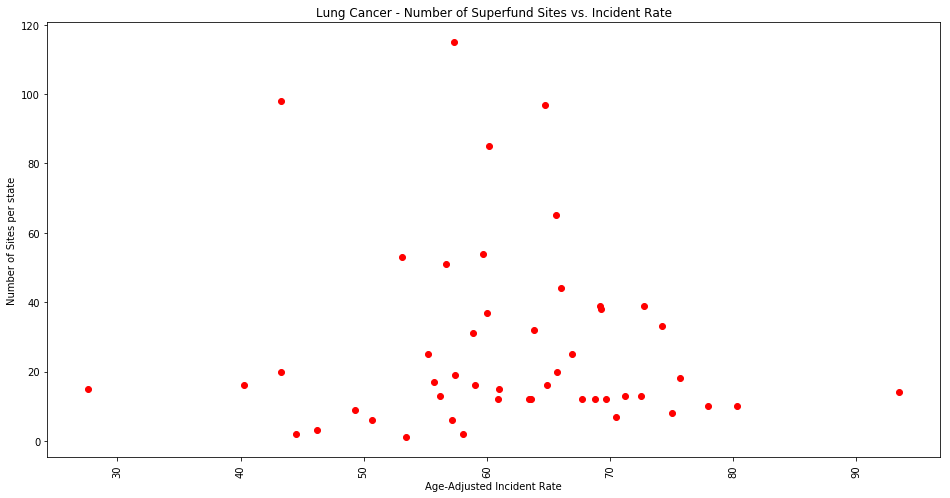

In [26]:
lung_site_count  = lung_short["Sites"].tolist()
lung_age_rate  = lung_short["Age-Adjusted Incident Rate"].tolist()

plt.title("Lung Cancer - Number of Superfund Sites vs. Incident Rate")
plt.xlabel("Age-Adjusted Incident Rate")
plt.ylabel("Number of Sites per state")
plt.scatter(lung_age_rate, lung_site_count, marker="o", color="red")
plt.xticks(rotation='vertical',linespacing = 1)
plt.savefig("Images/lung_cancer_scatter.png")
plt.show()

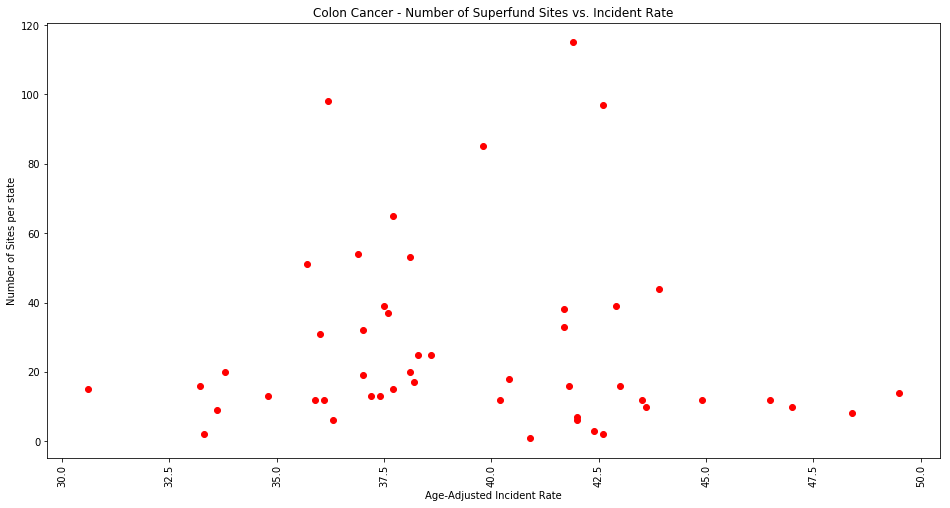

In [27]:
colon_site_count  = colon_short["Sites"].tolist()
colon_age_rate  = colon_short["Age-Adjusted Incident Rate"].tolist()

plt.title("Colon Cancer - Number of Superfund Sites vs. Incident Rate")
plt.xlabel("Age-Adjusted Incident Rate")
plt.ylabel("Number of Sites per state")
plt.xticks(rotation='vertical', linespacing=1)
plt.scatter(colon_age_rate, colon_site_count, marker="o", color="red")
plt.savefig("Images/colon_cancer_scatter.png")
plt.show()

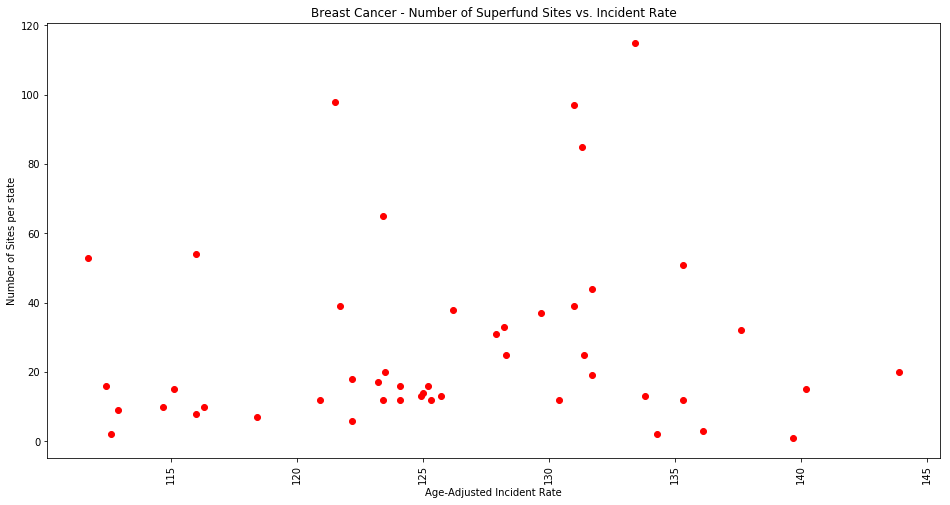

In [28]:
breast_site_count  = breast_short["Sites"].tolist()
breast_age_rate    = breast_short["Age-Adjusted Incident Rate"].tolist()

plt.title("Breast Cancer - Number of Superfund Sites vs. Incident Rate")
plt.xlabel("Age-Adjusted Incident Rate")
plt.ylabel("Number of Sites per state")
plt.xticks(rotation='vertical', linespacing=1)
plt.scatter(breast_age_rate, breast_site_count, marker="o", color="red")
plt.savefig("Images/breast_cancer_scatter.png")
plt.show()

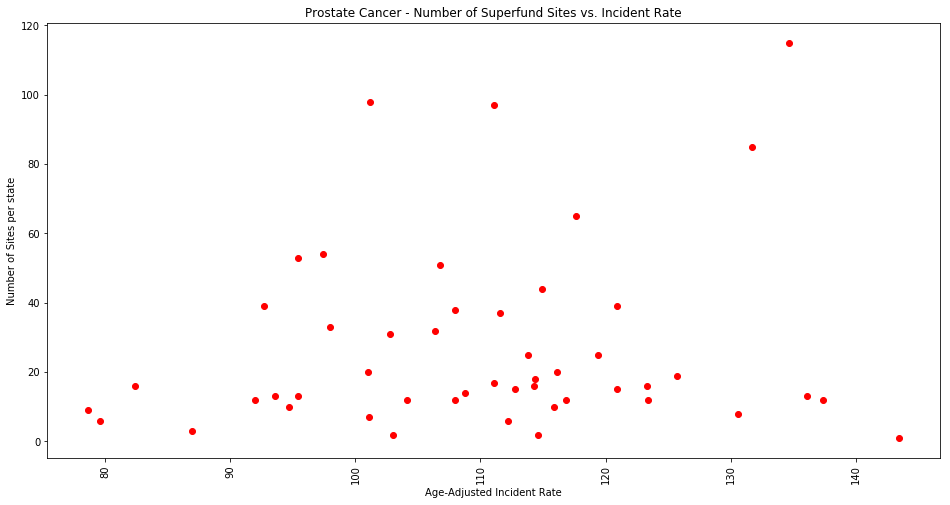

In [29]:
prostate_site_count  = prostate_short["Sites"].tolist()
prostate_age_rate    = prostate_short["Age-Adjusted Incident Rate"].tolist()

plt.title("Prostate Cancer - Number of Superfund Sites vs. Incident Rate")
plt.xlabel("Age-Adjusted Incident Rate")
plt.ylabel("Number of Sites per state")
plt.xticks(rotation='vertical', linespacing=1)
plt.scatter(prostate_age_rate, prostate_site_count, marker="o", color="red")
plt.savefig("Images/prostate_cancer_scatter.png")
plt.show()

In [30]:
# CALCULATE CORRELATION VALUES

In [31]:
critical_value = stats.chi2.ppf(q=0.95, df =2)
critical_value

5.991464547107979

In [32]:
chi = stats.chisquare(lung_short['Sites'], lung_short['Age-Adjusted Incident Rate'])

l_site = lung_short['Sites'].tolist()
l_age  = lung_short['Age-Adjusted Incident Rate'].tolist()

print ("CHI: " + str(chi))

coe = numpy.corrcoef(l_site, l_age)
print("CORRCOEF: " + str(coe))

pear = stats.pearsonr(l_site, l_age)
print("PERSONR: " + str(pear))

CHI: Power_divergenceResult(statistic=1575.820535207682, pvalue=1.0820288475370917e-298)
CORRCOEF: [[ 1.         -0.06878606]
 [-0.06878606  1.        ]]
PERSONR: (-0.06878605931281667, 0.6386199430170627)


In [37]:
c_site = colon_short['Sites'].tolist()
c_age  = colon_short['Age-Adjusted Incident Rate'].tolist()

coe = numpy.corrcoef(c_site, c_age)
print("CORRCOEF: " + str(coe))

pear = stats.pearsonr(c_site, c_age)
print("PERSONR: " + str(pear))

CORRCOEF: [[ 1.        -0.0450524]
 [-0.0450524  1.       ]]
PERSONR: (-0.045052401241172796, 0.7585529003661419)


In [38]:
b_site = breast_short['Sites'].tolist()
b_age  = breast_short['Age-Adjusted Incident Rate'].tolist()

coe = numpy.corrcoef(b_site, b_age)
print("CORRCOEF: " + str(coe))

pear = stats.pearsonr(b_site, b_age)
print("PERSONR: " + str(pear))

CORRCOEF: [[1.         0.11488614]
 [0.11488614 1.        ]]
PERSONR: (0.11488614259418942, 0.4368324916865034)


In [35]:
chi = stats.chisquare(prostate_short['Sites'], prostate_short['Age-Adjusted Incident Rate'])

p_site = prostate_short['Sites'].tolist()
p_age  = prostate_short['Age-Adjusted Incident Rate'].tolist()

print ("CHI: " + str(chi))

coe = numpy.corrcoef(p_site, p_age)
print("CORRCOEF: " + str(coe))

pear = stats.pearsonr(p_site, p_age)
print("PERSONR: " + str(pear))

CHI: Power_divergenceResult(statistic=3349.5022424950735, pvalue=0.0)
CORRCOEF: [[1.         0.13846898]
 [0.13846898 1.        ]]
PERSONR: (0.13846897641356834, 0.3427010302987997)
